# Initial Setup

## Import Standard Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# import time series data: Airline passenger traffic

In [3]:
data = pd.read_csv("airline-passenger-traffic.csv", header=None)
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")

In [4]:
data.set_index('Month', inplace=True)

# Time Series Analysis

## Plot Time series Data

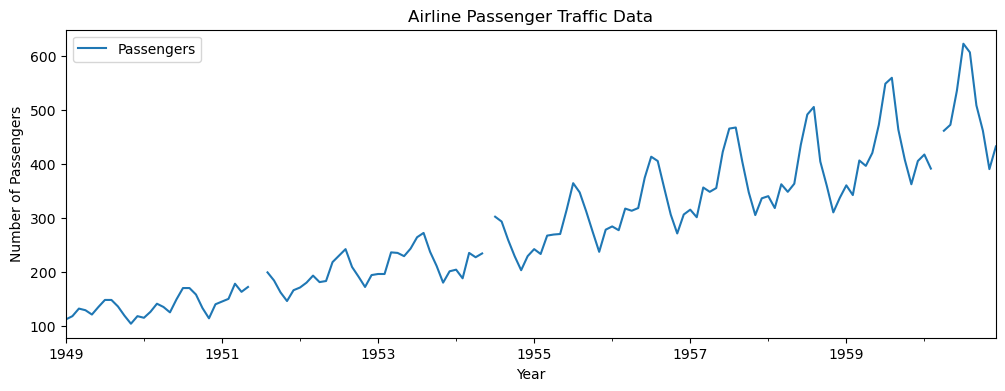

In [6]:
# Plotting the data
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic Data')
plt.xlabel('Year')  # Label the x-axis as 'Year'
plt.ylabel('Number of Passengers')  # Label the y-axis as 'Number of Passengers'

# Display the plot
plt.show(block=False)

# Missing Value Treatment

## Mean Imputation

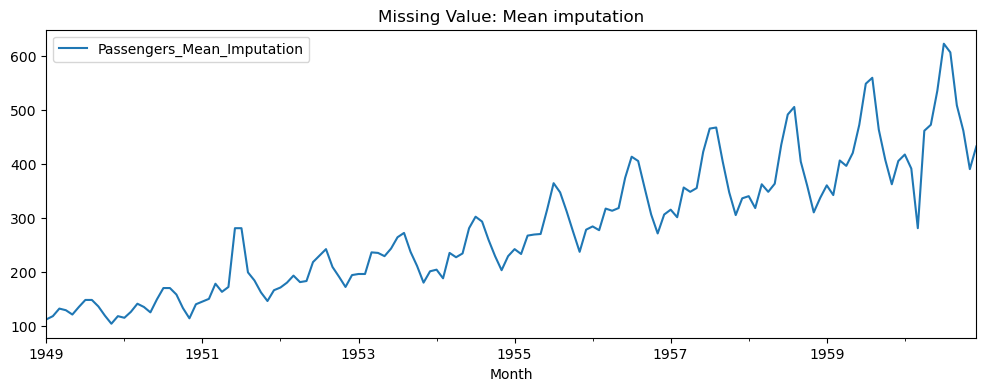

In [7]:
data = data.assign(Passengers_Mean_Imputation = data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing Value: Mean imputation')
plt.show(block=False)

##  Linear Interpolation

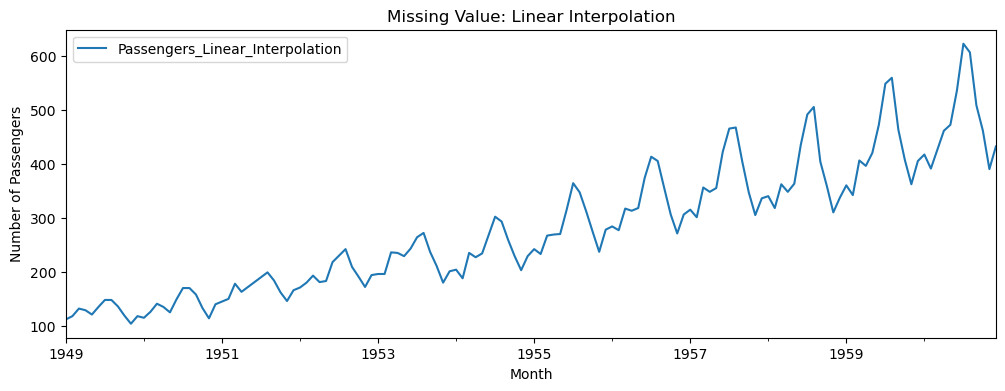

In [8]:
# Assign the linearly interpolated data to a new column with the correct spelling
data = data.assign(Passengers_Linear_Interpolation=data['Passengers'].interpolate(method='linear'))

# Now you can plot the interpolated data using the correct column name
data[['Passengers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Missing Value: Linear Interpolation')
plt.xlabel('Month')  # Assuming 'Month' is the index and you want it labeled
plt.ylabel('Number of Passengers')

# Display the plot
plt.show(block=False)





### Use Linear interpolation to impute missing value

In [9]:
data['Passengers'] = data['Passengers_Linear_Interpolation']

In [10]:
data.head()

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation
Month,,,
1949-01-01,112.0,112.0,112.0
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0


# Outlier Detection

## Box plot  and interquartile range

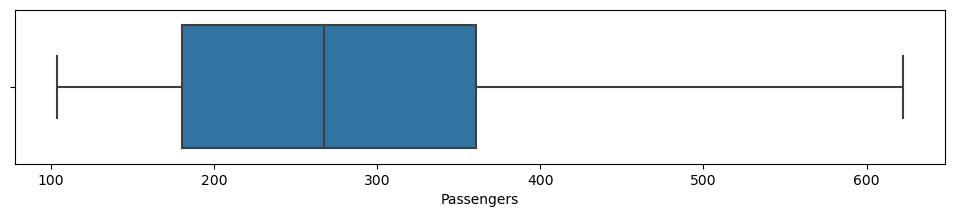

In [11]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x = data['Passengers'], whis=1.5)

In [12]:
# Calculate the first quartile (Q1)
Q1 = data['Passengers'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = data['Passengers'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the IQR
print(f"The interquartile range (IQR) is: {IQR}")

The interquartile range (IQR) is: 179.75


In [13]:
Outlier1 = Q3 + IQR*1.5
print(f"Outlier1  is: {Outlier1}")

Outlier1  is: 630.125


In [14]:
# However, the right whisker does not extend past the maximum data point
# So, we need to determine the maximum value within the right whisker's range
right_whisker_endpoint = data['Passengers'][data['Passengers'] <= Outlier1].max()

# Print the right whisker endpoint
print(f"The right whisker extends to: {right_whisker_endpoint}")

The right whisker extends to: 622.0


In [15]:
Outlier2 = Q1 - IQR*1.5
print(f"Outlier1  is: {Outlier2}")

Outlier1  is: -88.875


In [16]:
# However, the right whisker does not extend past the maximum data point
# So, we need to determine the maximum value within the right whisker's range
left_whisker_endpoint = data['Passengers'][data['Passengers'] <= Outlier2].max()

# Print the right whisker endpoint
print(f"The left whisker extends to: {left_whisker_endpoint}")

The left whisker extends to: nan


### Histogram Plot

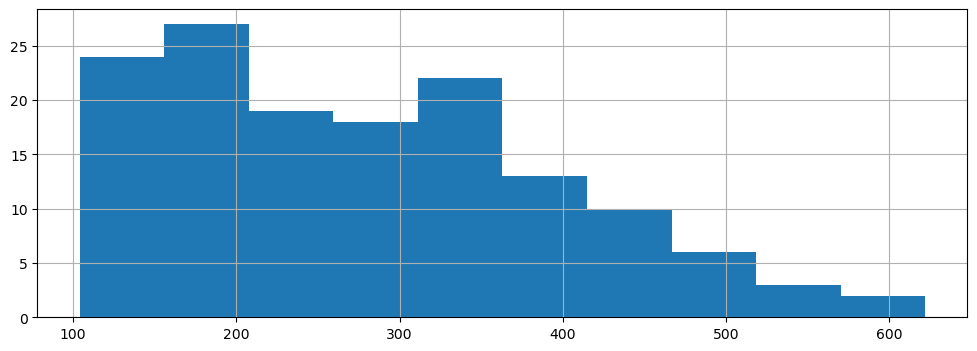

In [17]:
fig = data.Passengers.hist(figsize=(12,4))

No Outliers identified in the data given

# DECOMPOSE TIME SERIES DATASET

### Additive seasonal decomposition.

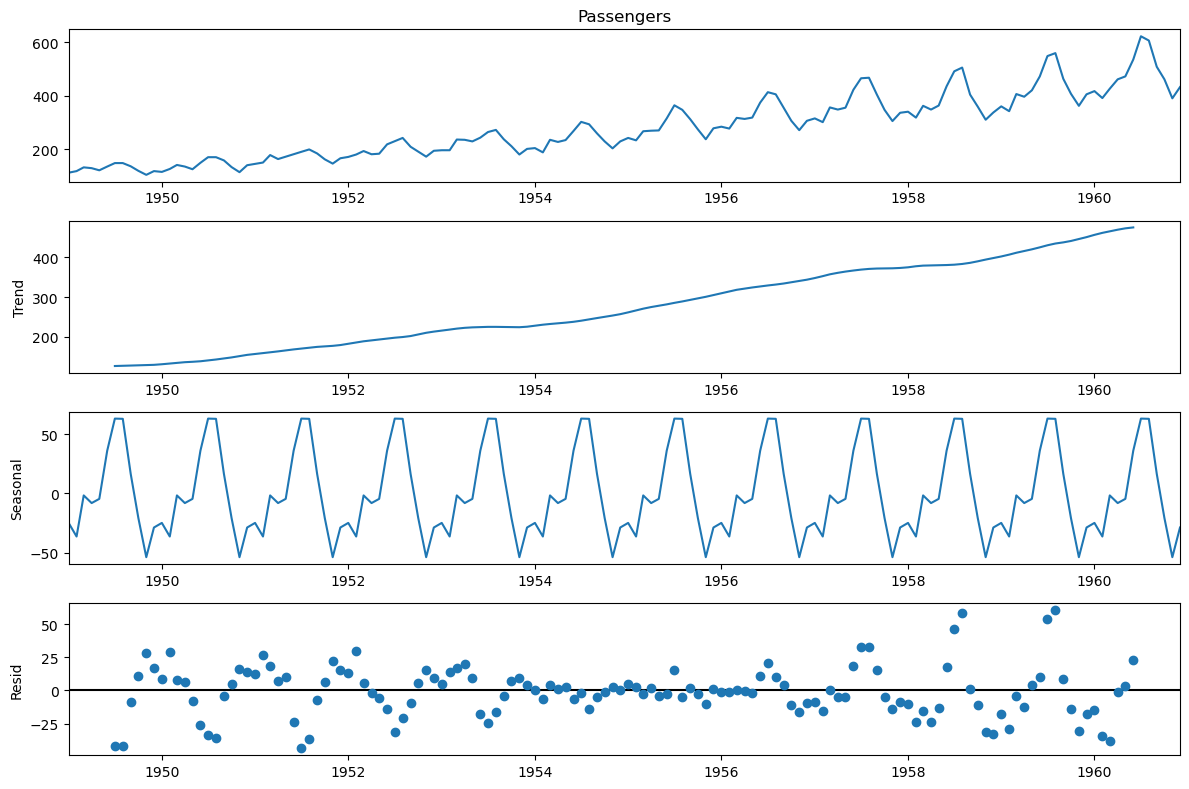

In [18]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig = decomposition.plot()
plt.show()


### Multiplicative Seasonal Decomposition

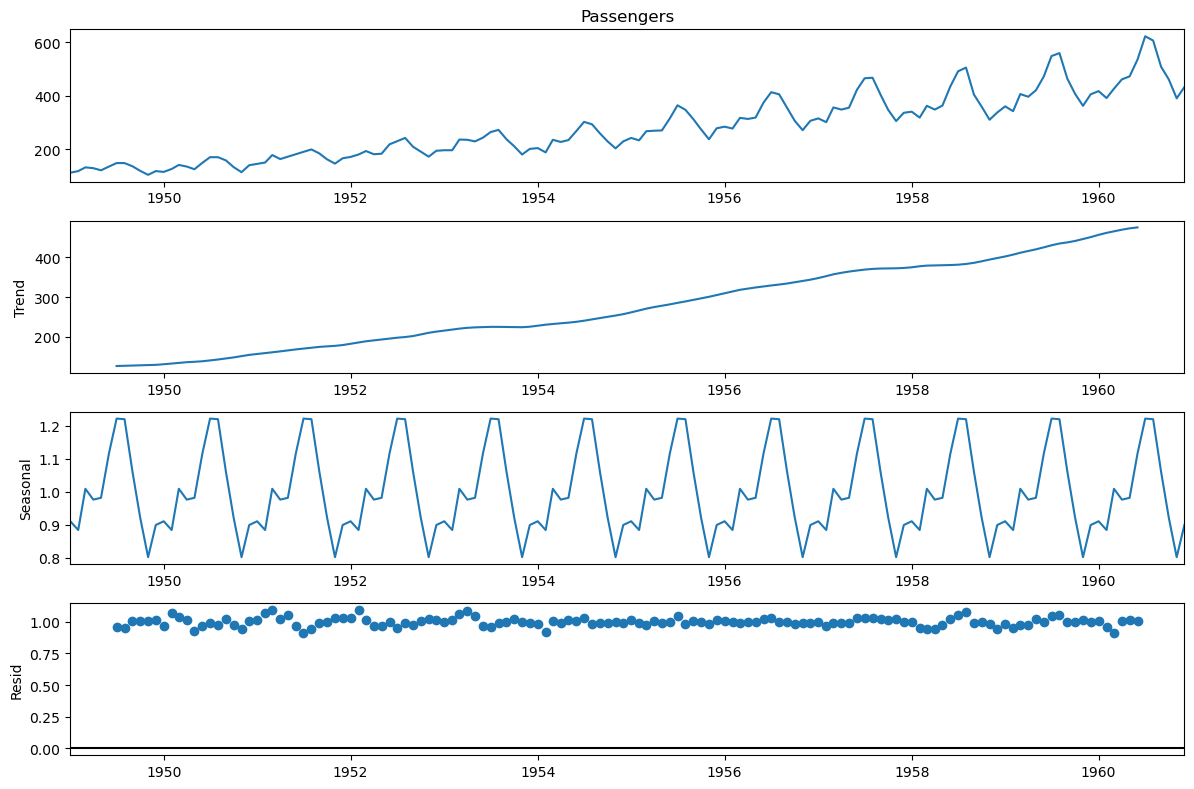

In [19]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')
fig = decomposition.plot()
plt.show()



## BUILD AND EVALUATE TIME SERIES FORECAST

## Splitting the time series into Training and Test Set

In [20]:
train_len =120
train = data[0:train_len] # First 120 lines
test = data[train_len:] 

### Naive method

In [21]:
y_hat_naive = test.copy()
###Calculating the next value based on the navive method
y_hat_naive['naive_forecast'] = train['Passengers'][train_len -1]

### plot , test and forecast

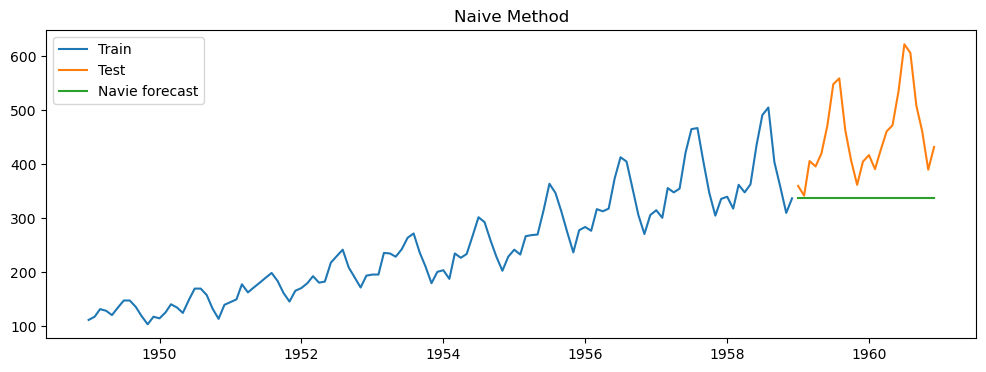

In [22]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label='Navie forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()


### Simple Average Method

In [23]:
y_hat_avg = test.copy()
###Caluclate the next value based on the simple average method.
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

### Plot Train , Test and Forecast

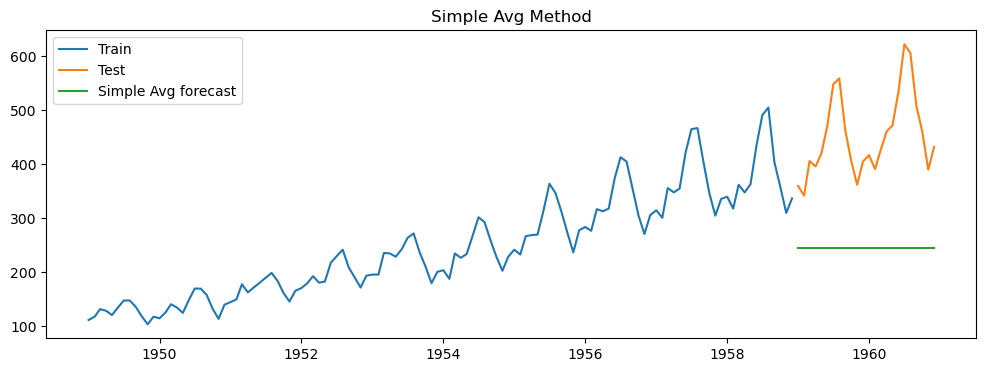

In [24]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Avg forecast')
plt.legend(loc='best')
plt.title("Simple Avg Method")
plt.show()



### Calculate the RMSE and MAPE to evaluate forecast

In [25]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)
results = pd.DataFrame({'Method' :['Naive method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63


In [26]:
#Accuracy for Naive Average Method

accuracy = (1-(mape/100))*100
print("Accuracy", accuracy)

Accuracy 76.37


### Calculate RMSE and MAPE to evaluate forecast

In [27]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple avg method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple avg method,219.69,44.28


In [28]:
#Accuracy for Simple Average Method

accuracy = (1-(mape/100))*100
print("Accuracy", accuracy)

Accuracy 55.71999999999999


## Simple Moving Average

In [29]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean() #Rolling 12 month average
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### plot train, test and forecast

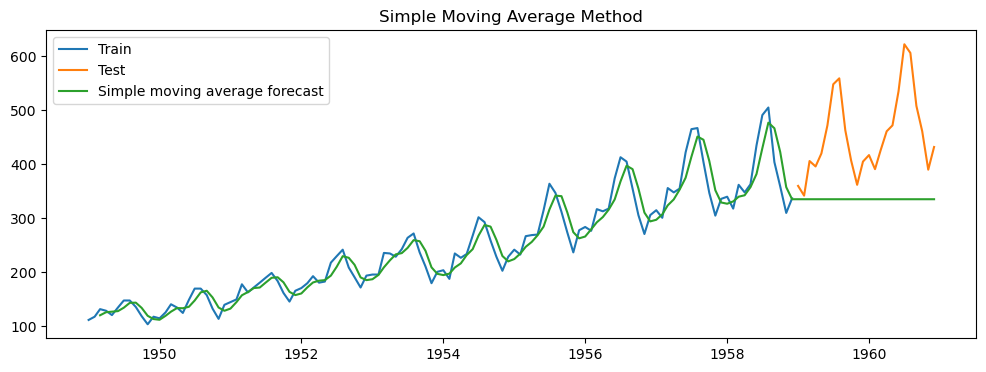

In [30]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label = 'Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE to evaluate forecast

In [31]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Moving Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple avg method,219.69,44.28
0,Simple Moving Average Method,138.91,24.01


### Simple Exponential Smoothing

In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)


### Plot Train, Test and forecast

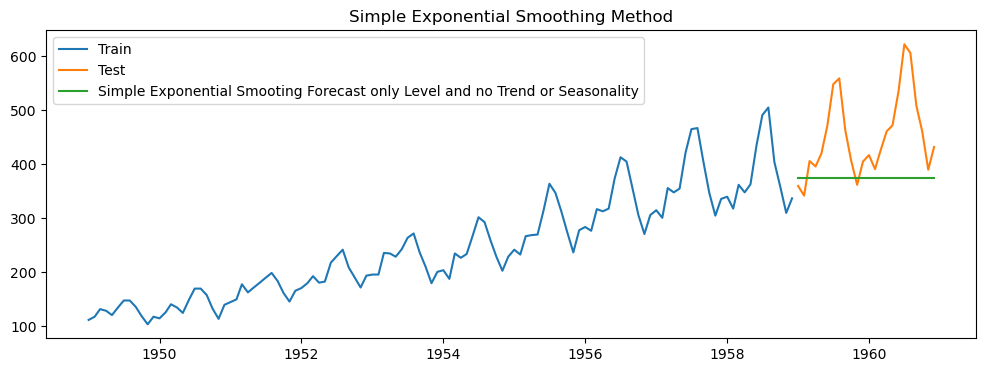

In [33]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exponential Smooting Forecast only Level and no Trend or Seasonality')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [34]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Exponential Smoothing Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results = results[['Method','RMSE','MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple avg method,219.69,44.28
0,Simple Moving Average Method,138.91,24.01
0,Simple Exponential Smoothing Method,107.65,16.49


### Holt's Exponential Smooting Method with Trend

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(24)


{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.4666666666666, 'initial_trend': 2.060606060606069, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot Train , Test and Forecast

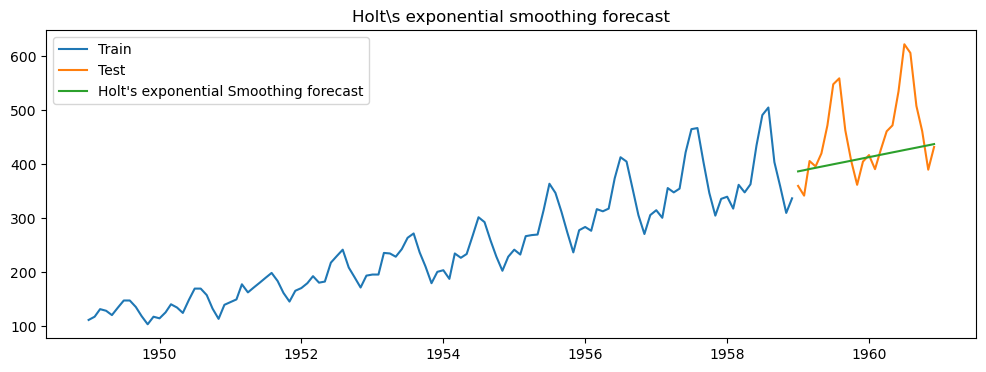

In [56]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential Smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\s exponential smoothing forecast')
plt.show()

### Calculate RMSE and MAPE

In [39]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holt\'s Exponential Smoothing Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results = results[['Method','RMSE','MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple avg method,219.69,44.28
0,Simple Moving Average Method,138.91,24.01
0,Simple Exponential Smoothing Method,107.65,16.49
0,Holt\s Exponential Smoothing Method,80.91,11.39
0,Holt's Exponential Smoothing Method,80.91,11.39


### Holt Winters' Additive Method with Trend and Seasonality

In [57]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2361171978116132, 'smoothing_trend': 7.679615363850196e-11, 'smoothing_seasonal': 0.7638828018270181, 'damping_trend': nan, 'initial_level': 119.14045289095831, 'initial_trend': 2.2766888689244404, 'initial_seasons': array([ -9.41693238,  -3.89040624,   8.62486483,   3.53570972,
        -5.16150036,   8.98263745,  21.24863145,  19.32984306,
         5.24250075, -13.60564542, -28.28759186, -12.13664608]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### PLot Train, Test and Forecast Data

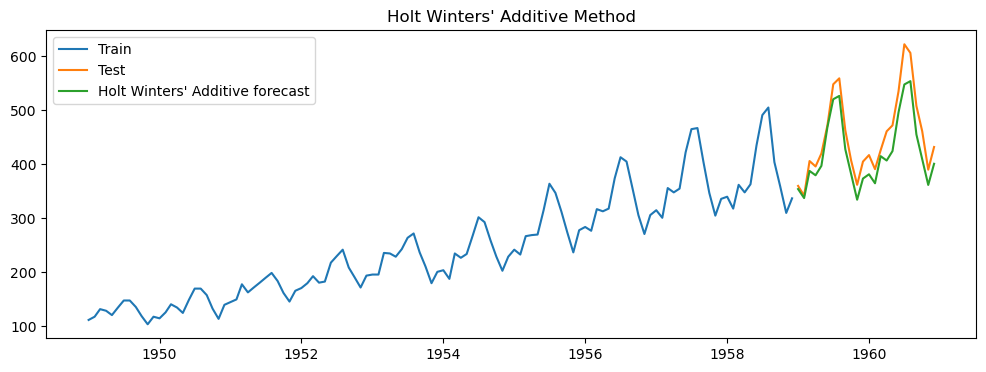

In [58]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt Winters\' Additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate the RMSE and MAPE

In [59]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hwa_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holt Winters Additive Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results = results[['Method','RMSE','MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple avg method,219.69,44.28
0,Simple Moving Average Method,138.91,24.01
0,Simple Exponential Smoothing Method,107.65,16.49
0,Holt\s Exponential Smoothing Method,80.91,11.39
0,Holt's Exponential Smoothing Method,80.91,11.39
0,Holt Winters Additive Method,35.87,6.72


### Holt Winters Multiplicative Method with Trend and Seasonality

In [60]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.3655776181336739, 'smoothing_trend': 7.000160790713375e-07, 'smoothing_seasonal': 0.6344221915208443, 'damping_trend': nan, 'initial_level': 100.91058555806529, 'initial_trend': 2.1854790058193623, 'initial_seasons': array([1.08633829, 1.14268054, 1.25600203, 1.19404046, 1.10209938,
       1.205238  , 1.31063023, 1.30172641, 1.18746833, 1.03480496,
       0.91994195, 1.06136388]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### PLot Train, Test and Forecast Data

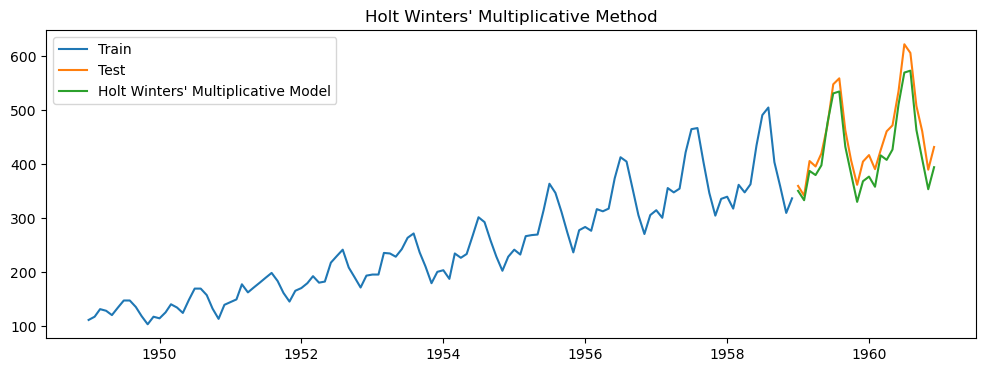

In [61]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt Winters\' Multiplicative Model')
plt.legend(loc='best')
plt.title('Holt Winters\' Multiplicative Method')
plt.show()

In [62]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hwm_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holt Winters Multiplicative Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results = results[['Method','RMSE','MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple avg method,219.69,44.28
0,Simple Moving Average Method,138.91,24.01
0,Simple Exponential Smoothing Method,107.65,16.49
0,Holt\s Exponential Smoothing Method,80.91,11.39
0,Holt's Exponential Smoothing Method,80.91,11.39
0,Holt Winters Additive Method,35.87,6.72
0,Holt Winters Multiplicative Method,32.45,6.45
